In [2]:
import sys
print(sys.executable)

C:\Users\andre\AppData\Local\Programs\Python\Python312\python.exe


In [3]:
import os
print("DIR: ")  
print(os.getcwd())

DIR: 
C:\Users\andre\Desktop\PIANETI_STELLE


                 objid          ra        dec  redshift  type         u  \
0  1237664869216289195  150.050997  30.773877  0.999999     3  25.22501   
1  1237678858480256034   20.200700  11.509172  0.999998     3  25.06447   
2  1237678879953584626   15.309469  -3.030697  0.999997     3  22.76108   
3  1237665374405394580  236.472613  22.669976  0.999996     6  19.30090   
4  1237659163880915354  231.432215  48.557953  0.999996     6  20.32626   

          g         r         i         z  
0  22.19054  22.28873  21.97035  21.10712  
1  23.54554  22.33624  20.82907  19.76874  
2  22.82600  22.33715  21.83812  21.57255  
3  19.15252  18.93033  19.04016  19.02150  
4  20.22036  20.01596  19.93121  19.95363  


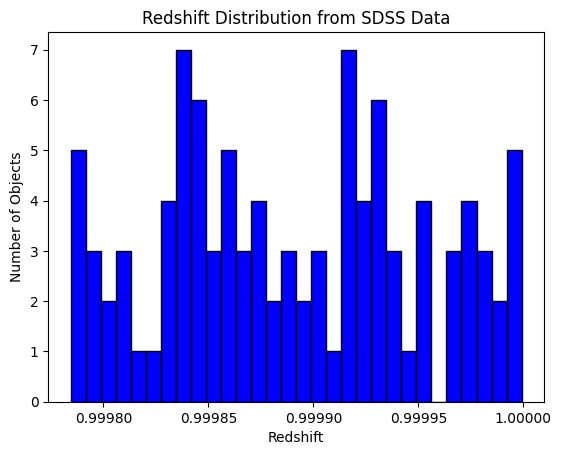

In [4]:
# Importa le librerie necessarie
from astroquery.sdss import SDSS
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt

# Query al catalogo SDSS per ottenere i dati di redshift
query = """
SELECT TOP 100
    p.objid, p.ra, p.dec, s.z as redshift, p.type, p.u, p.g, p.r, p.i, p.z
FROM
    PhotoObjAll AS p
JOIN
    SpecObj AS s ON s.bestobjid = p.objid
WHERE
    s.zWarning = 0
AND
    s.z BETWEEN 0.01 AND 1
ORDER BY
    s.z DESC
"""

# Effettua la query
result = SDSS.query_sql(query)

# Converti i dati in un DataFrame di Pandas
df = result.to_pandas()

# Mostra le prime righe del dataset
print(df.head())

# Salva il risultato in un file CSV (opzionale)
df.to_csv("redshift_sdss_data.csv", index=False)

# Visualizza una distribuzione del redshift
plt.hist(df['redshift'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Redshift')
plt.ylabel('Number of Objects')
plt.title('Redshift Distribution from SDSS Data')
plt.show()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   objid     100 non-null    uint64 
 1   ra        100 non-null    float64
 2   dec       100 non-null    float64
 3   redshift  100 non-null    float64
 4   type      100 non-null    int64  
 5   u         100 non-null    float64
 6   g         100 non-null    float64
 7   r         100 non-null    float64
 8   i         100 non-null    float64
 9   z         100 non-null    float64
dtypes: float64(8), int64(1), uint64(1)
memory usage: 7.9 KB


In [6]:
df['type']

0     3
1     3
2     3
3     6
4     6
     ..
95    6
96    3
97    6
98    3
99    3
Name: type, Length: 100, dtype: int64

Valore	Tipo di Oggetto
- 0   Unknown/Unclassifiable
- 1	Star
- 2	Galaxy
- 3	Quasar (QSO, quasar-like)
- 6	Sky (Patch of sky, no object)

In [9]:
# Filtra il dataset per trovare solo le stelle (type = 1)
df_stars = df[df['type'] == 3]

# Visualizza le prime righe del dataset filtrato
print(df_stars.head())

                 objid          ra        dec  redshift  type         u  \
0  1237664869216289195  150.050997  30.773877  0.999999     3  25.22501   
1  1237678858480256034   20.200700  11.509172  0.999998     3  25.06447   
2  1237678879953584626   15.309469  -3.030697  0.999997     3  22.76108   
5  1237666408456716836   32.660115   0.368009  0.999990     3  23.24536   
6  1237667252927660809  148.543294  23.989736  0.999988     3  22.83593   

          g         r         i         z  
0  22.19054  22.28873  21.97035  21.10712  
1  23.54554  22.33624  20.82907  19.76874  
2  22.82600  22.33715  21.83812  21.57255  
5  22.65306  22.34027  21.47431  22.43574  
6  23.41611  22.16912  21.89307  21.03018  


In [12]:
df_stars['redshift']

0     0.999999
1     0.999998
2     0.999997
5     0.999990
6     0.999988
7     0.999984
8     0.999984
14    0.999969
15    0.999969
16    0.999964
18    0.999953
27    0.999930
28    0.999929
29    0.999929
31    0.999927
32    0.999924
34    0.999922
35    0.999918
37    0.999917
48    0.999889
49    0.999886
51    0.999883
53    0.999876
54    0.999874
55    0.999872
62    0.999858
65    0.999854
67    0.999852
68    0.999848
73    0.999842
77    0.999838
78    0.999838
81    0.999834
84    0.999830
85    0.999825
86    0.999818
87    0.999811
90    0.999803
92    0.999796
94    0.999792
96    0.999789
98    0.999785
99    0.999784
Name: redshift, dtype: float64

In [13]:
df_stars['redshift_standardized'] = (df_stars['redshift'] - df_stars['redshift'].mean()) / df_stars['redshift'].std()
df_stars['redshift_standardized']

C:\Users\andre\AppData\Local\Temp\ipykernel_3760\3495149446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stars['redshift_standardized'] = (df_stars['redshift'] - df_stars['redshift'].mean()) / df_stars['redshift'].std()


0     1.587653
1     1.568749
2     1.557116
5     1.456780
6     1.423335
7     1.368077
8     1.362261
14    1.147048
15    1.147048
16    1.081611
18    0.910022
27    0.584295
28    0.568299
29    0.568299
31    0.542124
32    0.495592
34    0.460693
35    0.412706
37    0.396710
48   -0.014812
49   -0.058436
51   -0.100606
53   -0.208213
54   -0.237296
55   -0.257654
62   -0.461234
65   -0.525216
67   -0.549936
68   -0.613919
73   -0.695351
77   -0.754970
78   -0.760787
81   -0.808774
84   -0.868393
85   -0.944009
86   -1.054524
87   -1.147589
90   -1.259558
92   -1.368618
94   -1.426784
96   -1.463138
98   -1.522757
99   -1.535845
Name: redshift_standardized, dtype: float64

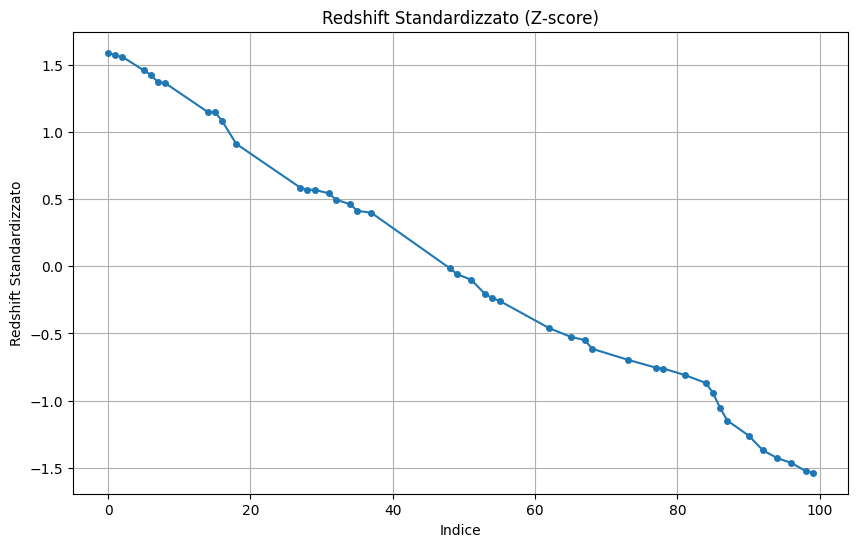

In [16]:
# Grafico a dispersione per 'redshift_standardized'
plt.figure(figsize=(10, 6))
plt.plot(df_stars['redshift_standardized'], marker='o', linestyle='-', markersize=4)
plt.title('Redshift Standardizzato (Z-score)')
plt.xlabel('Indice')
plt.ylabel('Redshift Standardizzato')
plt.grid()
plt.show()

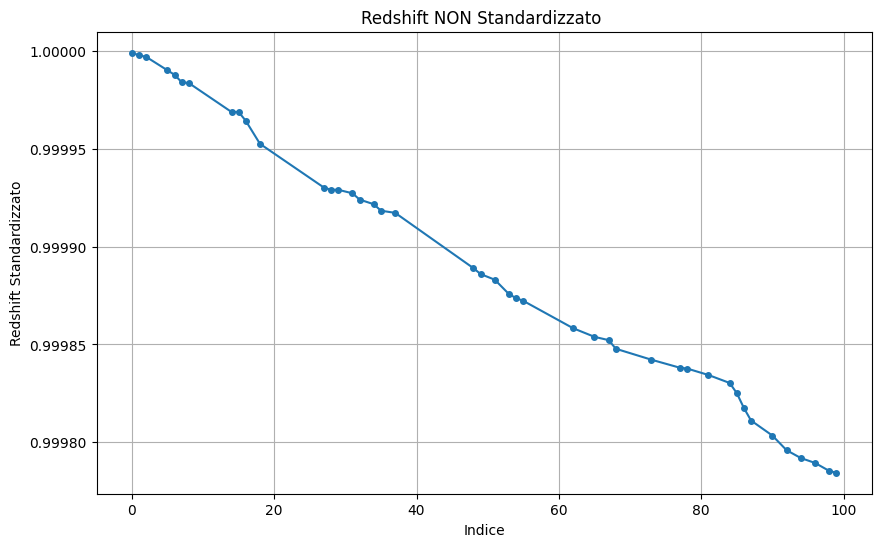

In [17]:
# Grafico a dispersione per 'redshift_standardized'
plt.figure(figsize=(10, 6))
plt.plot(df_stars['redshift'], marker='o', linestyle='-', markersize=4)
plt.title('Redshift NON Standardizzato ')
plt.xlabel('Indice')
plt.ylabel('Redshift Standardizzato')
plt.grid()
plt.show()

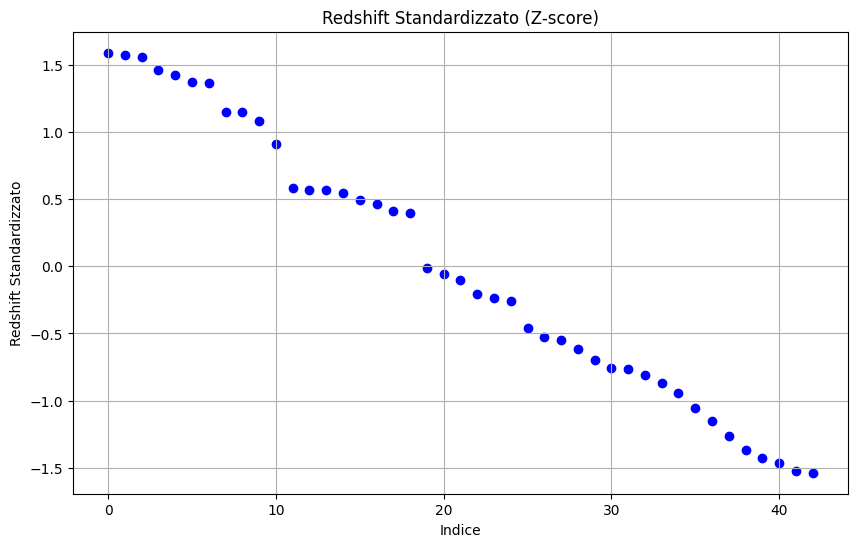

In [18]:
# Grafico a dispersione per 'redshift_standardized'
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_stars['redshift_standardized'])), df_stars['redshift_standardized'], color='blue', marker='o')
plt.title('Redshift Standardizzato (Z-score)')
plt.xlabel('Indice')
plt.ylabel('Redshift Standardizzato')
plt.grid()
plt.show()